In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
digits = tf.keras.datasets.mnist.load_data()

In [3]:
digits_a, digits_b = digits

In [4]:
digits_X, digits_y = digits_b
len(digits_X)

10000

In [5]:
digits_X = np.array(digits_X)
digits_y = np.array(digits_y)

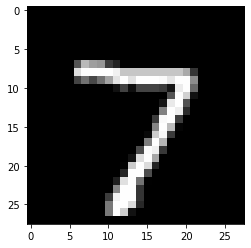

In [6]:
plt.imshow(digits_X[0],cmap='gray')

In [7]:
fashion = tf.keras.datasets.fashion_mnist.load_data()

In [8]:
fashion_a, fashion_b = fashion

In [9]:
fashion_X, fashion_y = fashion_a
len(fashion_X)

60000

In [10]:
fashion_X = np.array(fashion_X)
fashion_y = np.array(fashion_y)

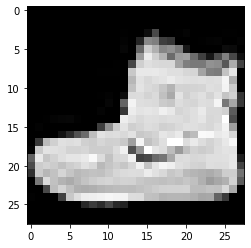

In [11]:
plt.imshow(fashion_X[0],cmap='gray')

In [18]:
np.random.seed(42)
idx_L = np.random.randint(0,len(fashion_X),len(fashion_X)*2)
idx_R = np.random.randint(0,len(fashion_X),len(fashion_X)*2)
idx_M = np.random.randint(0,len(digits_X),len(fashion_X)*2)

In [20]:
L_X, L_y = fashion_X[idx_L], fashion_y[idx_L]
M_X, M_y = digits_X[idx_M], digits_y[idx_M]
R_X, R_y = fashion_X[idx_R], fashion_y[idx_R]

In [38]:
X = np.concatenate([L_X,M_X,R_X],axis=2)
y = np.stack(L_y*(M_y % 2 == 0) + R_y*(M_y % 2 != 0))

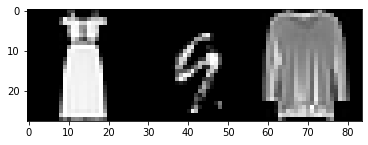

In [48]:
plt.imshow(X[0],cmap='gray')

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test,test_size = 0.5, random_state=42)

In [67]:
from tensorflow.keras import layers, models, losses

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(28, 84,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
history = model.fit(X_train, y_train, epochs=2, 
                    validation_data=(X_valid, y_valid))

Epoch 1/2
 159/2625 [>.............................] - ETA: 43s - loss: 1.1296 - accuracy: 0.5619

KeyboardInterrupt: 